In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
data= pd.read_excel('OutputScriptMarie_KovatsMatchOnly70.xlsx.xlsx', sheetname ='to use for NDMS')

In [3]:
#NORMALIZATION DATA BY SUM
for i in range(0, data.shape[0]):
    data.iloc[i, 2:] = data.iloc[i,2:] / sum(data.iloc[i,2:])

In [23]:
#SUBSET DATA BY SPECIES FOR PLOT MEAN ABUNDANCE CHEMICAL
data_Obt = data.iloc[0:39, :]
data_Dil = data.iloc[53:70, :]
data_Stri = data.iloc[88:105, :]
data_Cil = data.iloc[105:111, :] 
data_Hur = data.iloc[78:88, :]

In [24]:
print 'The sample size of each group is', data_Obt.shape,  data_Dil.shape,  data_Stri.shape,  data_Cil.shape,  data_Hur.shape

The sample size of each group is (39, 56) (17, 56) (17, 56) (6, 56) (10, 56)


In [6]:
#RANDOM SUBSET OBT, DIL and STRI SO N~10 per species
subset_Obt = np.random.choice(range(0, data_Obt.shape[0]), 10)
subset_Dil = np.random.choice(range(0, data_Dil.shape[0]), 10)
subset_Stri = np.random.choice(range(0, data_Stri.shape[0]), 10)

data_Obt = data_Obt.iloc[subset_Obt, :]
data_Stri = data_Stri.iloc[subset_Stri, :]
data_Dil = data_Dil.iloc[subset_Dil, :]

In [7]:
Cil = np.repeat(1, data_Cil.shape[0])
Dil = np.repeat(2, data_Dil.shape[0])
Str = np.repeat(3, data_Stri.shape[0])
Obt = np.repeat(0, data_Obt.shape[0])
Hur = np.repeat(4, data_Hur.shape[0])
Species = np.concatenate((Obt, Dil, Str, Cil, Hur))

dataAll = np.vstack((data_Obt, data_Dil, data_Stri, data_Cil, data_Hur))

from sklearn.decomposition import PCA
pcaExp = PCA()
pcaExp.fit(dataAll[:, 2:])
print pcaExp.components_.shape[0],'components come out of this decomposition'#


46 components come out of this decomposition


9 components are required to explain 90% of the variance in the data


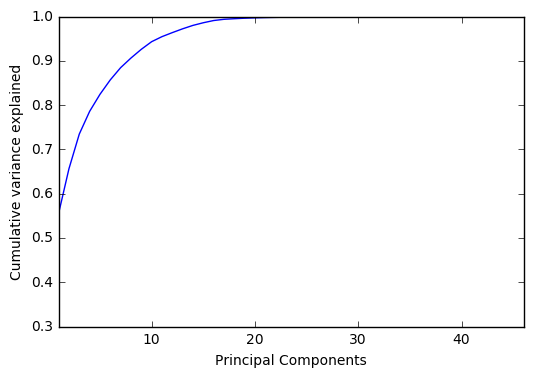

In [8]:
plt.plot(np.cumsum(pcaExp.explained_variance_ratio_))
plt.ylabel('Cumulative variance explained')
plt.xlabel('Principal Components')
plt.xlim(1,pcaExp.components_.shape[0])


CumSumExp = np.cumsum(pcaExp.explained_variance_ratio_)
for i in range(0, len(CumSumExp)):
    if CumSumExp[i] >= 0.9:
        print i+1, 'components are required to explain 90% of the variance in the data'
        break

In [9]:
def test_train_id(N, test_frac):
    Samples = np.arange(0,N)
    Fraction = test_frac*N
    test = np.random.choice(range(0,N), round(Fraction))
    train = np.delete(Samples, test)
    return test, train   

In [15]:
def cross_val_class_accuracy(model, X, y, r, test_frac, reps):
    Accuracy = np.zeros(reps)
    for i in range(reps):
        test, train = test_train_id(46, test_frac)
        DataTest = X[test, :]
        DataTrain = X[train, :]
        pcaExp_train = PCA(r)
        pcaExp_train.fit(DataTrain)
        Train_red = pcaExp_train.transform(DataTrain)
        Test_red = pcaExp_train.transform(DataTest)
        mymodel = model
        model.fit(Train_red, y[train])
        Predict = model.predict(Test_red)
        Accuracy[i] = np.mean(Predict == y[test])
    cv_acc = np.mean(Accuracy)
    sd_acc = np.std(Accuracy)
    return cv_acc, sd_acc

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn import tree

KNN2 = cross_val_class_accuracy(KNeighborsClassifier(5), dataAll[:, 2:], Species, 10, 0.2, 200)
LDA5 = cross_val_class_accuracy(LinearDiscriminantAnalysis(), dataAll[:, 2:], Species, 10, 0.2, 200)
LDA20 = cross_val_class_accuracy(LinearDiscriminantAnalysis(), dataAll[:, 2:], Species, 20, 0.2, 200)
SVM20 = cross_val_class_accuracy(SVC(kernel='linear'), dataAll[:, 2:], Species, 10, 0.2, 200)
DT20 = cross_val_class_accuracy(tree.DecisionTreeClassifier(), dataAll[:, 2:], Species, 10, 0.2, 200)    

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


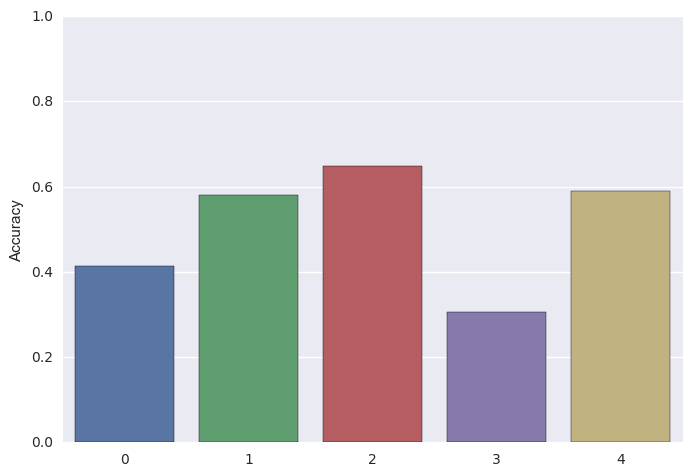

In [19]:
import seaborn as sns 
sns.barplot(range(5), [KNN2[0], LDA5[0], LDA20[0], SVM20[0], DT20[0]])
plt.ylim(0,1)
plt.ylabel('Accuracy')